In [1]:
from Model.Energy import GaussianEnergy
from Model.Proposal import GaussianProposal
from Data import get_dataloader_from_data
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from Model.Trainer import SNLTrainer

/opt/miniconda3/envs/lime_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Training data 

In [2]:
target_distribution = torch.distributions.Normal(torch.tensor([0,0], dtype=torch.float32) , torch.tensor([4,2], dtype=torch.float32))


In [3]:
sample_target_cartesian = target_distribution.sample((20000,))


print(sample_target_cartesian)

dataset_total = TensorDataset(sample_target_cartesian, )
data_train, data_val, data_test = torch.utils.data.random_split(dataset_total, [10000, 5000, 5000])
dataloader_train = DataLoader(data_train, batch_size=100, shuffle=True)
dataloader_val = DataLoader(data_val, batch_size=100, shuffle=False)

tensor([[ 0.7960,  0.6568],
        [-2.8597,  1.8469],
        [ 1.4625, -0.0647],
        ...,
        [ 2.0105,  4.1408],
        [ 0.8019, -4.6244],
        [-8.1220,  0.7830]])


/var/folders/j8/dm7qjtj55w3f6yvlj6rd2vx40000gn/T/ipykernel_4229/558728721.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525849783/work/torch/csrc/utils/tensor_new.cpp:233.)
  Z = target_distribution.log_prob(torch.tensor([X,Y], dtype=torch.float32).permute(1,2,0)).sum(-1).exp().numpy()


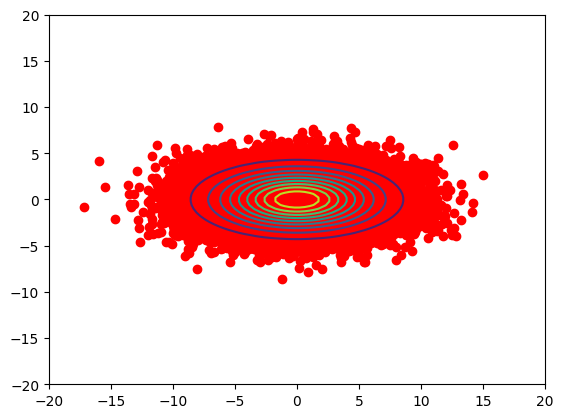

In [4]:


fig = plt.figure()
ax = fig.add_subplot(111)
# Add gaussian distribution as contours

x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = target_distribution.log_prob(torch.tensor([X,Y], dtype=torch.float32).permute(1,2,0)).sum(-1).exp().numpy()

ax.contour(X, Y, Z, levels=10)


# Add points
ax.scatter(sample_target_cartesian[...,0], sample_target_cartesian[...,1], color='r')

# Proposal

In [5]:
proposal_distribution = GaussianProposal(torch.Size([2,]), torch.tensor([0,0], dtype=torch.float32), torch.tensor([10,10], dtype=torch.float32))

Init Standard Gaussian...


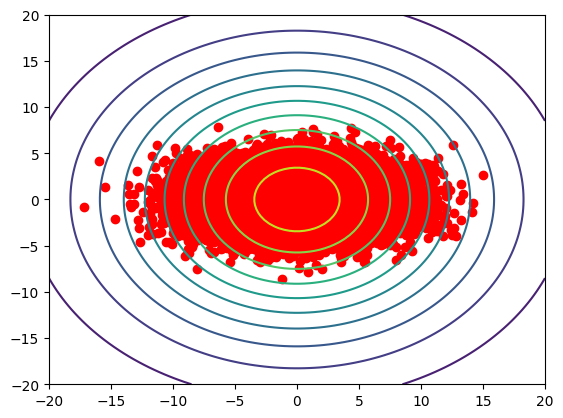

In [6]:
sample_proposal = proposal_distribution.sample(1000,)

fig = plt.figure()
ax = fig.add_subplot(111)
# Add gaussian distribution as contours

x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
input_grid = torch.tensor([X,Y], dtype=torch.float32).permute(1,2,0)
Z = proposal_distribution.log_prob(input_grid.flatten(0,1)).exp().numpy().reshape(X.shape)
ax.contour(X, Y, Z, levels=10)


# Add points
ax.scatter(sample_target_cartesian[...,0], sample_target_cartesian[...,1], color='r')

# Energy

In [7]:
energy = GaussianEnergy(dim=2, learn_mu=True, learn_sigma=True)

In [8]:
energy(x=sample_target_cartesian)

tensor([ 0.5325,  5.7945,  1.0715,  ..., 10.5939, 11.0139, 33.2898],
       grad_fn=<MulBackward0>)

# Trainer :


In [9]:
trainer = SNLTrainer(energy=energy, proposal=proposal_distribution, dataloader=dataloader_train, val_dataloader=dataloader_val , n_sample_train=1000, n_sample_test=1000, lr=0.01, )

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hugosenetaire. Use `wandb login --relogin` to force relogin


In [10]:
trainer.train(n_iter=100000, n_iter_pretrain=10000,)

Step 0
Step 1000
Step 2000
Step 3000
Step 4000
Step 5000
Step 6000
Step 7000
Step 8000
Step 9000
Step 10000
Step 11000
Step 12000
Step 13000
Step 14000
Step 15000
Step 16000
Step 17000
Step 18000
Step 19000
Step 20000
Step 21000
Step 22000
Step 23000
Step 24000
Step 25000
Step 26000
Step 27000
Step 28000
Step 29000
Step 30000
Step 31000
Step 32000
Step 33000
Step 34000
Step 35000
Step 36000
Step 37000
Step 38000
Step 39000
Step 40000
Step 41000
Step 42000
Step 43000
Step 44000
Step 45000
Step 46000
Step 47000
Step 48000
Step 49000
Step 50000
Step 51000
Step 52000
Step 53000
Step 54000
Step 55000
Step 56000
Step 57000
Step 58000
Step 59000
Step 60000
Step 61000
Step 62000
Step 63000
Step 64000
Step 65000
Step 66000
Step 67000
Step 68000
Step 69000
Step 70000
Step 71000
Step 72000
Step 73000
Step 74000
Step 75000
Step 76000
Step 77000
Step 78000
Step 79000
Step 80000
Step 81000
Step 82000
Step 83000
Step 84000
Step 85000
Step 86000
Step 87000
Step 88000
Step 89000
Step 90000
Step 91000
S